## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read dataset

In [3]:
df = pd.read_csv('data/raw/twitter_human_bots_dataset.csv', index_col=0)

df.head()

,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,2016-10-15 21:32:11,False,False,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,False,787405734442958848,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7874121826...,best_in_dumbest,11041,False,7.870,1403,bot
1,2016-11-09 05:01:30,False,False,Photographing the American West since 1980. I ...,536,860,880,False,796216118331310080,en,Estados Unidos,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8023296328...,CJRubinPhoto,252,False,0.183,1379,human
2,2017-06-17 05:34:27,False,False,Scruffy looking nerf herder and @twitch broadc...,3307,172,594,True,875949740503859204,en,"Los Angeles, CA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1278890453...,SVGEGENT,1001,False,0.864,1159,human
3,2016-07-21 13:32:25,True,False,Wife.Godmother.Friend.Feline Fanatic! Assistan...,8433,517,633,True,756119643622735875,en,"Birmingham, AL",NaN,http://pbs.twimg.com/profile_images/1284884924...,TinkerVHELPK5,1324,False,0.889,1489,human
4,2012-01-15 16:32:35,False,False,Loan coach at @mancity & Aspiring DJ,88,753678,116,True,464781334,en,"England, United Kingdom",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9952566258...,JoleonLescott,4202,True,1.339,3138,human


## Data cleaning  
Check for null values, outliers

In [4]:
df.isnull().sum()

created_at                         0
default_profile                    0
default_profile_image              0
description                     7257
favourites_count                   0
followers_count                    0
friends_count                      0
geo_enabled                        0
id                                 0
lang                            7957
location                           4
profile_background_image_url    4499
profile_image_url                  1
screen_name                        0
statuses_count                     0
verified                           0
average_tweets_per_day             0
account_age_days                   0
account_type                       0
dtype: int64

In [5]:
df.describe()

,favourites_count,followers_count,friends_count,id,statuses_count,average_tweets_per_day,account_age_days
count,37438.000000,3.743800e+04,3.743800e+04,3.743800e+04,3.743800e+04,37438.000000,37438.000000
mean,12302.062183,3.703098e+05,4.445925e+03,1.221536e+17,2.107339e+04,6.891668,3022.128052
std,33923.650237,2.470829e+06,4.954520e+04,3.004313e+17,6.732977e+04,24.580116,1013.695870
min,0.000000,0.000000e+00,0.000000e+00,4.180000e+02,0.000000e+00,0.000000,483.000000
25%,362.000000,3.500000e+01,3.700000e+01,9.957306e+07,1.336250e+03,0.495000,2316.250000
50%,2066.000000,3.650000e+02,2.960000e+02,3.991474e+08,4.209000e+03,1.488000,3219.000000
75%,8879.000000,8.440250e+03,8.930000e+02,2.453826e+09,1.715375e+04,5.528000,3888.000000
max,885123.000000,1.216415e+08,4.343060e+06,1.120974e+18,2.771910e+06,1269.055000,5158.000000


## EDA  
Bot verified accounts vs legitimate verified accounts

In [6]:
bot_verified = df[(df['verified']==True) & (df['account_type']=='bot')]

bot_verified.head()

,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
39,2009-02-02 19:04:42,False,False,#WholeNewGame,618,30999003,1748,True,19923144,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1278101392...,NBA,259723,True,61.619,4215,bot
55,2009-05-11 19:34:19,False,False,Canal de noticias 24 horas de @rtve \n▪https:/...,3617,1437950,935,True,39321874,pt,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1144547866...,24h_tve,300978,True,73.106,4117,bot
95,2009-02-02 19:10:35,False,False,Diario ABC. También en https://t.co/8XvlveA4...,1115,2015401,14905,False,19923515,es,España,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1270225649...,abc_es,435389,True,103.295,4215,bot
136,2009-02-12 19:48:55,False,False,To find us in your area: https://t.co/A0IOVeFN...,20442,1630092,4946,True,20710218,en,"Secaucus, NJ",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1280194069...,MLBNetwork,68901,True,16.385,4205,bot
375,2010-05-21 18:00:16,False,False,Official Twitter support for PlayStation produ...,2,1538905,2935,False,146540920,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/3788000002...,AskPlayStation,1066811,True,285.091,3742,bot


In [7]:
legit_verified = df[(df['verified']==True) & (df['account_type']=='human')]

legit_verified.head()

,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
4,2012-01-15 16:32:35,False,False,Loan coach at @mancity & Aspiring DJ,88,753678,116,True,464781334,en,"England, United Kingdom",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9952566258...,JoleonLescott,4202,True,1.339,3138,human
6,2009-07-08 22:22:59,False,False,"Co-Host of @TheTalkCBS, Judge on @DancingABC, ...",5522,291529,1581,True,55050269,en,Los Angeles,http://abs.twimg.com/images/themes/theme14/bg.gif,http://pbs.twimg.com/profile_images/1275104892...,carrieanninaba,14535,True,3.581,4059,human
7,2012-09-07 20:01:33,False,False,Internationally-acclaimed Egyptian Singer.,756,6909959,40,False,809500704,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1243989369...,sherine,1223,True,0.421,2902,human
12,2009-01-28 16:41:51,False,False,Fashion and style news(+occasional sport) from...,16614,262121,643,True,19660870,en,"London, New York, Paris, Milan",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1125638856...,HilaryAlexander,36392,True,8.624,4220,human
13,2011-06-08 03:55:18,False,False,soon,49058,1950090,1574,False,313087874,so,he/him,http://abs.twimg.com/images/themes/theme18/bg.gif,http://pbs.twimg.com/profile_images/1293424873...,JacobWhitesides,81833,True,24.355,3360,human


In [8]:
bot_verified.describe()

,favourites_count,followers_count,friends_count,id,statuses_count,average_tweets_per_day,account_age_days
count,316.000000,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,316.000000,316.000000
mean,13090.534810,2.417507e+06,5.489445e+04,8.717185e+15,1.600771e+05,41.437130,3845.262658
std,39601.635466,6.193116e+06,2.348202e+05,9.001613e+16,2.136926e+05,57.097049,684.799123
min,0.000000,6.640000e+02,0.000000e+00,3.097300e+04,9.700000e+02,0.312000,723.000000
25%,376.000000,1.545508e+05,2.100000e+02,1.957994e+07,3.173200e+04,8.714250,3536.000000
50%,2169.500000,7.877910e+05,8.850000e+02,5.371381e+07,9.219950e+04,24.260000,4063.000000
75%,8662.000000,1.633395e+06,4.104500e+03,2.263703e+08,2.028330e+05,49.265250,4222.000000
max,376844.000000,4.955794e+07,2.169597e+06,1.033984e+18,1.680407e+06,468.494000,5011.000000


In [9]:
legit_verified.describe()

,favourites_count,followers_count,friends_count,id,statuses_count,average_tweets_per_day,account_age_days
count,7235.000000,7.235000e+03,7.235000e+03,7.235000e+03,7235.000000,7235.000000,7235.000000
mean,12619.691223,1.683992e+06,7.492193e+03,8.074309e+15,26055.628058,6.789332,3723.421424
std,29890.647382,5.225289e+06,7.941681e+04,8.156455e+16,43100.723681,10.957949,628.170106
min,0.000000,3.100000e+02,0.000000e+00,4.180000e+02,0.000000,0.000000,803.000000
25%,641.500000,3.747450e+04,2.810000e+02,2.948050e+07,4832.500000,1.355000,3408.000000
50%,3316.000000,4.875410e+05,7.210000e+02,9.595727e+07,12337.000000,3.297000,3904.000000
75%,11987.500000,1.510814e+06,1.758000e+03,2.854213e+08,29101.000000,7.551500,4151.000000
max,687322.000000,1.216415e+08,4.343060e+06,1.004805e+18,857586.000000,228.324000,5158.000000


Hypothesis: Bot accounts have high activity (high `average_tweets_per_day`) and shorter account ages (`account_age_days`)

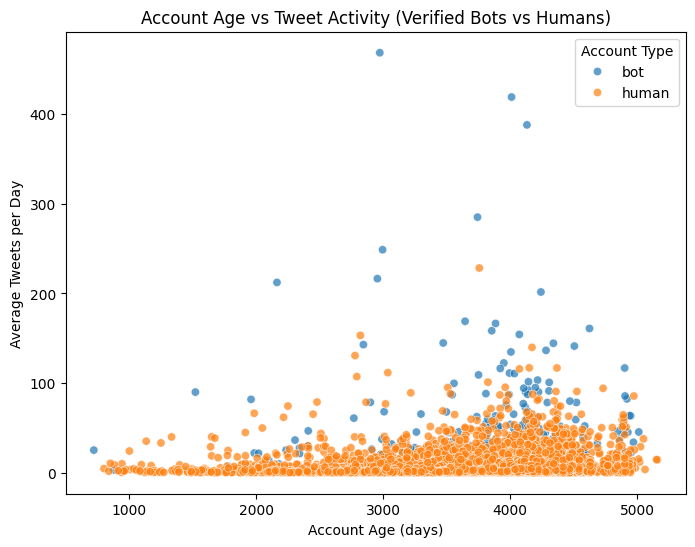

In [10]:
# Combine both DataFrames first
df1 = pd.concat([bot_verified, legit_verified])

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df1,
    x='account_age_days',
    y='average_tweets_per_day',
    hue='account_type',
    alpha=0.7
)
# plt.xscale('log')   
# plt.yscale('log')   
plt.title('Account Age vs Tweet Activity (Verified Bots vs Humans)')
plt.xlabel('Account Age (days)')
plt.ylabel('Average Tweets per Day')
plt.legend(title='Account Type')
plt.show()

Density (KDE) contour plot  
-- Emphasises density of points rather than individual scatter points

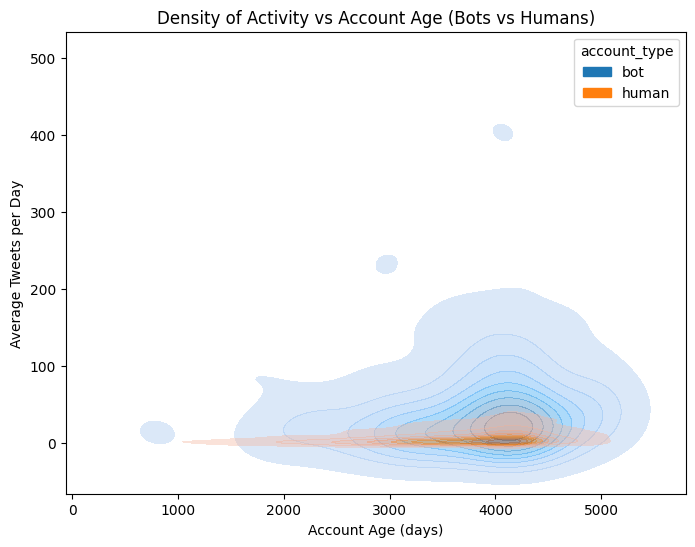

In [11]:
plt.figure(figsize=(8,6))
sns.kdeplot(
    data=df1,
    x='account_age_days',
    y='average_tweets_per_day',
    hue='account_type',
    fill=True,
    common_norm=False,
    alpha=0.4
)
# plt.xscale('log')
# plt.yscale('log')
plt.title('Density of Activity vs Account Age (Bots vs Humans)')
plt.xlabel('Account Age (days)')
plt.ylabel('Average Tweets per Day')
plt.show()

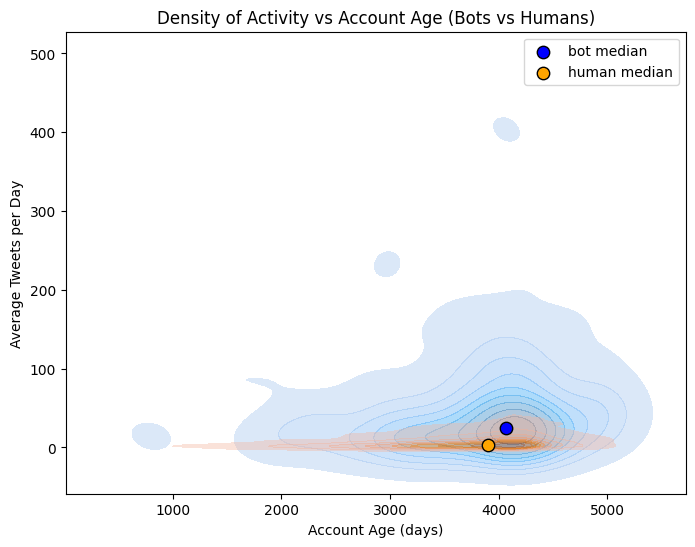

In [12]:
plt.figure(figsize=(8,6))
sns.kdeplot(
    data=df1,
    x='account_age_days',
    y='average_tweets_per_day',
    hue='account_type',
    fill=True,
    common_norm=False,
    alpha=0.4,
    bw_adjust=0.9
)
# plt.xscale('log')
# plt.yscale('log')

for t, color in zip(['bot', 'human'], ['blue', 'orange']):
    subset = df1[df1['account_type'] == t]
    plt.scatter(np.median(subset['account_age_days']),
                np.median(subset['average_tweets_per_day']),
                color=color, s=80, edgecolor='black', label=f'{t} median')
plt.legend()

plt.title('Density of Activity vs Account Age (Bots vs Humans)')
plt.xlabel('Account Age (days)')
plt.ylabel('Average Tweets per Day')
plt.show()

## EDA - bot vs human

In [13]:
bot = df[df['account_type']=='bot']

bot.head()

,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,2016-10-15 21:32:11,False,False,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,False,787405734442958848,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7874121826...,best_in_dumbest,11041,False,7.870,1403,bot
5,2016-11-21 22:50:30,True,False,لا إله إلا الله . فعل التنبيهات 🌷🎖عادل ...حساب...,237,27394,542,False,800833795234611200,ar,مكة المكرمة,NaN,http://pbs.twimg.com/profile_images/1273524501...,Ayat_140,11513,False,8.428,1366,bot
11,2014-06-21 00:14:06,False,False,micropoetry bot ¶ license: https://t.co/vuvanD...,0,26675,26,False,2579497028,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/4801568366...,poem_exe,24087,False,10.701,2251,bot
19,2011-10-03 22:39:21,True,False,NaN,510,6,33,False,384565337,NaN,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/5977552044...,ChuckBaechel,639,False,0.197,3242,bot
21,2013-02-15 21:29:28,True,False,You love it harshly? Come in! 💛💛💛 https://t.co...,187,4,0,False,1183842404,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9637784407...,ValdakR,23,False,0.008,2741,bot


In [14]:
human = df[df['account_type']=='human']

human.head()

,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
1,2016-11-09 05:01:30,False,False,Photographing the American West since 1980. I ...,536,860,880,False,796216118331310080,en,Estados Unidos,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8023296328...,CJRubinPhoto,252,False,0.183,1379,human
2,2017-06-17 05:34:27,False,False,Scruffy looking nerf herder and @twitch broadc...,3307,172,594,True,875949740503859204,en,"Los Angeles, CA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1278890453...,SVGEGENT,1001,False,0.864,1159,human
3,2016-07-21 13:32:25,True,False,Wife.Godmother.Friend.Feline Fanatic! Assistan...,8433,517,633,True,756119643622735875,en,"Birmingham, AL",NaN,http://pbs.twimg.com/profile_images/1284884924...,TinkerVHELPK5,1324,False,0.889,1489,human
4,2012-01-15 16:32:35,False,False,Loan coach at @mancity & Aspiring DJ,88,753678,116,True,464781334,en,"England, United Kingdom",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9952566258...,JoleonLescott,4202,True,1.339,3138,human
6,2009-07-08 22:22:59,False,False,"Co-Host of @TheTalkCBS, Judge on @DancingABC, ...",5522,291529,1581,True,55050269,en,Los Angeles,http://abs.twimg.com/images/themes/theme14/bg.gif,http://pbs.twimg.com/profile_images/1275104892...,carrieanninaba,14535,True,3.581,4059,human


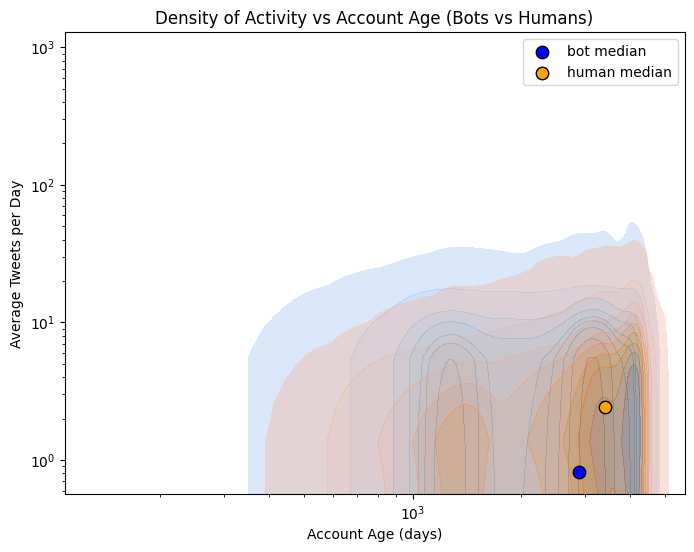

In [15]:
df2 = pd.concat([bot, human])

plt.figure(figsize=(8,6))
sns.kdeplot(
    data=df2,
    x='account_age_days',
    y='average_tweets_per_day',
    hue='account_type',
    fill=True,
    common_norm=False,
    alpha=0.4,
    bw_adjust=0.9
)
plt.xscale('log')
plt.yscale('log')

for t, color in zip(['bot', 'human'], ['blue', 'orange']):
    subset = df2[df2['account_type'] == t]
    plt.scatter(np.median(subset['account_age_days']),
                np.median(subset['average_tweets_per_day']),
                color=color, s=80, edgecolor='black', label=f'{t} median')
plt.legend()

plt.title('Density of Activity vs Account Age (Bots vs Humans)')
plt.xlabel('Account Age (days)')
plt.ylabel('Average Tweets per Day')
plt.show()

EDA but with and without the 316 rows of bot verified

In [31]:
df3 = df.copy()
df3.drop(df3[(df3['verified']==True) & (df3['account_type']=='bot')].index, inplace=True)

df3.head()

,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,2016-10-15 21:32:11,False,False,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,False,787405734442958848,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7874121826...,best_in_dumbest,11041,False,7.870,1403,bot
1,2016-11-09 05:01:30,False,False,Photographing the American West since 1980. I ...,536,860,880,False,796216118331310080,en,Estados Unidos,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8023296328...,CJRubinPhoto,252,False,0.183,1379,human
2,2017-06-17 05:34:27,False,False,Scruffy looking nerf herder and @twitch broadc...,3307,172,594,True,875949740503859204,en,"Los Angeles, CA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1278890453...,SVGEGENT,1001,False,0.864,1159,human
3,2016-07-21 13:32:25,True,False,Wife.Godmother.Friend.Feline Fanatic! Assistan...,8433,517,633,True,756119643622735875,en,"Birmingham, AL",NaN,http://pbs.twimg.com/profile_images/1284884924...,TinkerVHELPK5,1324,False,0.889,1489,human
4,2012-01-15 16:32:35,False,False,Loan coach at @mancity & Aspiring DJ,88,753678,116,True,464781334,en,"England, United Kingdom",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9952566258...,JoleonLescott,4202,True,1.339,3138,human


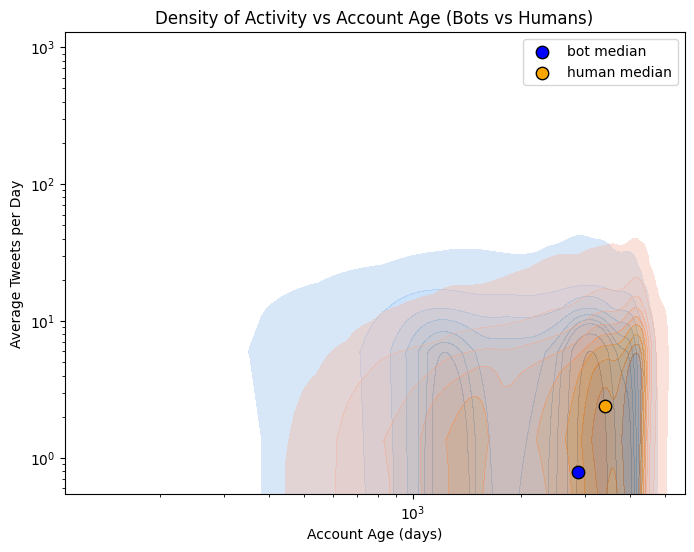

In [32]:
bot1 = df3[df3['account_type']=='bot']
human1 = df3[df3['account_type']=='human']

df4 = pd.concat([bot1, human1])

plt.figure(figsize=(8,6))
sns.kdeplot(
    data=df4,
    x='account_age_days',
    y='average_tweets_per_day',
    hue='account_type',
    fill=True,
    common_norm=False,
    alpha=0.4,
    bw_adjust=0.9
)
plt.xscale('log')
plt.yscale('log')

for t, color in zip(['bot', 'human'], ['blue', 'orange']):
    subset = df4[df4['account_type'] == t]
    plt.scatter(np.median(subset['account_age_days']),
                np.median(subset['average_tweets_per_day']),
                color=color, s=80, edgecolor='black', label=f'{t} median')
plt.legend()

plt.title('Density of Activity vs Account Age (Bots vs Humans)')
plt.xlabel('Account Age (days)')
plt.ylabel('Average Tweets per Day')
plt.show()

Conclusion: the `verified` column is not a strong signal to determine if the account is bot or human.